Extractor de características

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import hsv_to_rgb
# from matplotlib import cm
from matplotlib import colors
import os
from IPython.display import clear_output
import time 
import math
import statistics

import numpy as np
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy


In [3]:
def entropy(signal):
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1.0/p) for p in propab])
        return ent

In [4]:
light_yellow = np.array([0,120,20],np.uint8)
dark_yellow = np.array([175,255,255],np.uint8)

In [5]:
path = 'fruit_dataset/training/'

In [6]:
# obtenemos lista de imagenes a analizar
list = os.listdir(path)
print(len(list))

800


In [10]:
hue_feature = []
cva_feature = []
entropy_feature = []
energy_feature = []

(0): fruit_dataset/training/fruit_1.jpg
h_mean:  20.946276948328652
mean:  89.87553508953083
stdev:  2.4588433238655996
entropy:  85.70864429830053
energy:  [[0.51099148 0.50007817 0.50448969 0.50024223]
 [0.50492471 0.50007817 0.5018266  0.50024223]
 [0.49973556 0.49488324 0.49676726 0.49462348]]


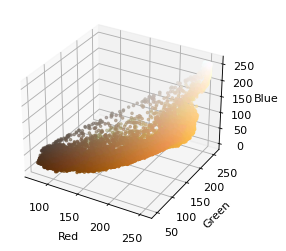

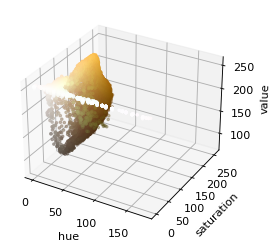

(1): fruit_dataset/training/fruit_10.jpg
h_mean:  92.35847401116064
mean:  190.6952697200721
stdev:  1.3636571909401818
entropy:  102.51503390913669
energy:  [[0.3760022  0.36890326 0.37245002 0.36880567]
 [0.37078162 0.36890326 0.36424422 0.36880567]
 [0.36694262 0.35911847 0.35919967 0.35859727]]


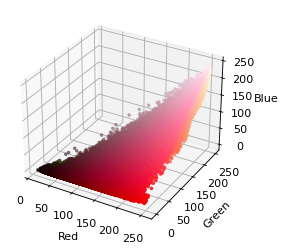

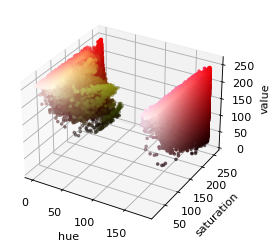

(2): fruit_dataset/training/fruit_1001.jpg
h_mean:  26.976826179229136
mean:  204.48227307030797
stdev:  0.0
entropy:  80.38500984641678
energy:  [[0.5254105  0.52112735 0.52519706 0.52113971]
 [0.5198422  0.52112735 0.51960124 0.52113971]
 [0.51541096 0.5124714  0.51524502 0.51256493]]


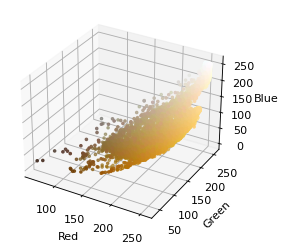

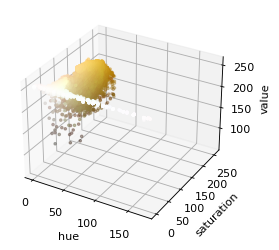

(3): fruit_dataset/training/fruit_1002.jpg
h_mean:  23.000305553433655
mean:  95.33610943565317
stdev:  30.18203352370033
entropy:  89.15615154301304
energy:  [[0.45953225 0.44875207 0.45622981 0.44856203]
 [0.44678206 0.44875207 0.44150533 0.44856203]
 [0.43906643 0.43181892 0.43123832 0.43181813]]


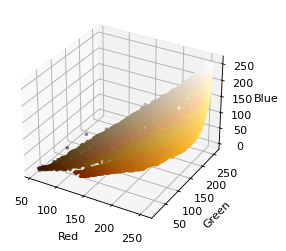

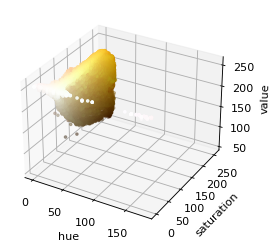

(4): fruit_dataset/training/fruit_101.jpg
h_mean:  20.298367948814075
mean:  94.46111261865767
stdev:  2.059886011774765
entropy:  101.16958296227418
energy:  [[0.29186847 0.28690224 0.29414341 0.28729839]
 [0.28383059 0.28690224 0.28762671 0.28729839]
 [0.27779857 0.27676566 0.28327187 0.27708492]]


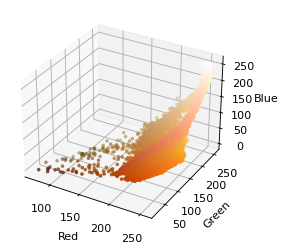

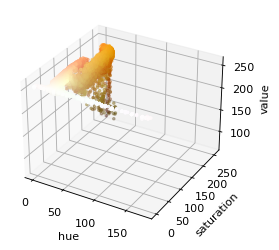

(5): fruit_dataset/training/fruit_103.jpg
h_mean:  38.00688458827994
mean:  111.67382173939248
stdev:  0.9785387669335758
entropy:  120.48250464986731
energy:  [[0.28184118 0.27665037 0.28173516 0.27605631]
 [0.27542632 0.27665037 0.27476497 0.27605631]
 [0.27086751 0.26812342 0.2703467  0.26693942]]


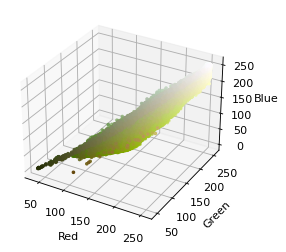

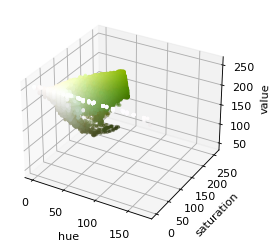

(6): fruit_dataset/training/fruit_105.jpg
h_mean:  77.03906364659264
mean:  85.339702407754
stdev:  9.819598708637843
entropy:  101.14880620235161
energy:  [[0.2935176  0.22684755 0.22817806 0.22668378]
 [0.28758498 0.22684755 0.22611458 0.22668378]
 [0.28453546 0.22410758 0.23171316 0.22395533]]


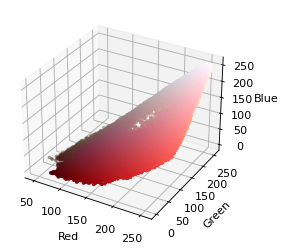

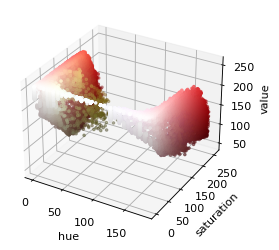

(7): fruit_dataset/training/fruit_106.jpg
h_mean:  36.91657175398633
mean:  48.466726775484226
stdev:  19.059557136806863
entropy:  86.34496864549445
energy:  [[0.4280541  0.42135358 0.42765031 0.42153803]
 [0.42056616 0.42135358 0.41985946 0.42153803]
 [0.41470852 0.41039193 0.41396153 0.41038269]]


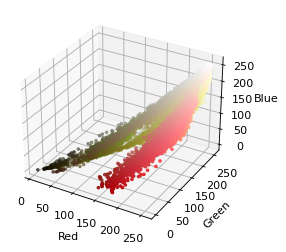

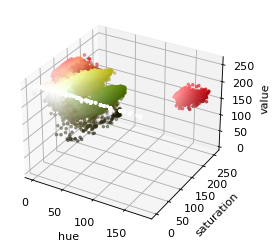

(8): fruit_dataset/training/fruit_107.jpg
h_mean:  40.46442841575424
mean:  91.49697501623073
stdev:  5.572084717288538
entropy:  89.91949974173045
energy:  [[0.43577798 0.429493   0.43550896 0.42832341]
 [0.42549752 0.429493   0.42554936 0.42832341]
 [0.41925871 0.41794171 0.41911365 0.4162679 ]]


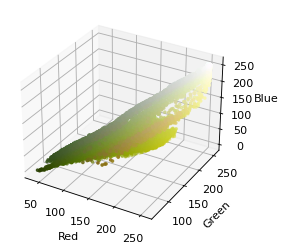

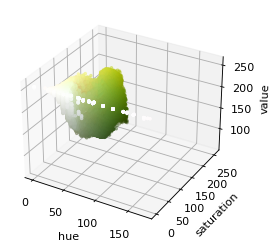

(9): fruit_dataset/training/fruit_108.jpg
h_mean:  118.09460809591337
mean:  30.653805015750287
stdev:  16.128298603204875
entropy:  96.35229059024742
energy:  [[0.43419177 0.42729908 0.42858721 0.42679108]
 [0.43053568 0.42729908 0.42222575 0.42679108]
 [0.42882616 0.42051925 0.41695334 0.42007968]]


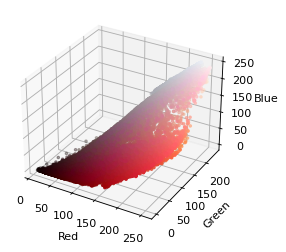

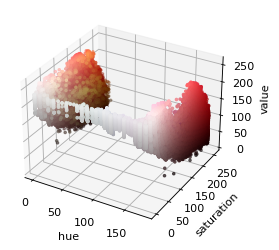

In [13]:
for i in range(10):
    plt.rcParams.update({'figure.max_open_warning': 0})
    img = cv2.imread(path+list[i])
    print('('+str(i)+'): '+path+list[i])
    
    # Reservamos la imagen original
    img_original = img 
    img_original_ = img
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img)
      
    # Plot 1
    fig = plt.figure(figsize=(8,6),dpi=80)
    axis = fig.add_subplot(1,2,1,projection="3d")
    
    # Configuración de color de píxeles
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1],3))

    # Normalizado
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    # Convertir a lista
    pixel_colors = norm(pixel_colors).tolist()

    # Mostrar diagrama de dispersión 3D
    axis.scatter(r.flatten(),g.flatten(),b.flatten(),facecolors=pixel_colors,marker='.')
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")

    # Visualización en espacio hsv
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv_img)
    
    # Plot 2
    fig = plt.figure(figsize=(8,6),dpi=80)
    axis = fig.add_subplot(1,2,2,projection="3d")

    # Configuración de color de píxeles
    pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1],3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    # Convertir a lista
    pixel_colors = norm(pixel_colors).tolist()

    # Mostrar diagrama de dispersión 3D
    axis.scatter(h.flatten(),s.flatten(),v.flatten(),facecolors=pixel_colors,marker='.')
    axis.set_xlabel("hue")
    axis.set_ylabel("saturation")
    axis.set_zlabel("value")
    
    #plt.show()
    
    # Hue feature
    
    h_mean = np.array(h)
    positives = h_mean > 0 # Ignoramos los 0 que corresponden al blanco
    if positives.any():
        h_mean = h_mean[positives].mean()
    
    print('h_mean: ',h_mean)
    
    hue_feature.append(h_mean)
    #print(hue_feature)
    
    # Center of gravity and circle variance
    
    mask = cv2.inRange(hsv_img,light_yellow,dark_yellow)
    contours, he = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(img_original, contours, -1, (255,0,0), 3)
    
    for c in contours:
        area = cv2.contourArea(c)
        if area > 5000:
            M = cv2.moments(c)
            if (M["m00"]==0): M["m00"]=1
            # Centriode
            x = int(M["m10"]/M["m00"])
            y = int(M['m01']/M['m00']) 
            centroide = np.array((x,y))
            cv2.circle(img_original, (x,y), 7, (0,255,0), -1)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img_original, '{},{}'.format(x,y),(x+10,y), font, 0.75,(0,255,0),1,cv2.LINE_AA)
            
            nuevoContorno = cv2.convexHull(c)
            
            circularity = cv2.drawContours(img_original, [nuevoContorno], 0, (255,0,0), 3)
   
    distances = []
    distances.clear()
    for i in range(0,len(c),2):
        point = np.array((c.item(i),c.item(i+1)))
        
        dis = math.dist(centroide,point)
        #print(point)
        #print(dis)
        distances.append(dis)
    
    # Cuando finalice obtener media y desviación estandar
   
    mean = statistics.mean(distances)
    st_dev = statistics.pstdev(distances)
    
    cva = st_dev/mean
    cva_feature.append(cva_feature)
    
    print('mean: ',mean)
    print('stdev: ',st_dev)
    
    
    # Entropy
    
    rgbImg = io.imread(path+list[i])
    grayImg = img_as_ubyte(color.rgb2gray(rgbImg))

    distances = [1, 2, 3]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    properties = ['energy', 'homogeneity']

    glcm = greycomatrix(grayImg, distances=distances, angles=angles,symmetric=True, normed=True)

    feats = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
    entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
    print("entropy: ", entropy)
    entropy_feature.append(entropy)
    
    # energy
    energy = greycoprops(glcm, 'energy')
    print("energy: ", energy)
    energy_feature.append(energy)
    
    
    plt.show()
    
    
    
    #cv2.imshow('maskAzul',mask)
    #cv2.imshow('original',img_original)
    #cv2.waitKey()
    
    cv2.destroyAllWindows()

    #clear_output(wait=True)
    

In [12]:
print(len(hue_feature))
print(len(cva_feature))
print(len(entropy_feature))
print(len(energy_feature))

10
10
10
10
